# KNN Algorithm Implementation

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

## load dataset

In [5]:
df = pd.read_csv('Social_Net_class.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
# check target variable
df.Purchased.unique()

array([0, 1], dtype=int64)

In [7]:
# check data is balanced or not
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [9]:
# remove UserID column
df.drop(columns=['User ID'],inplace=True)

In [10]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [11]:
df[:2]

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0


In [13]:
# check Unique records in Gender
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [21]:
#np.where(df.Gender=='Male',0,1)
#df['Gender'].map({'Male':0,'Female':1})
#df['Gender'].str.replace('Male','0')
df['Gender'].replace({'Male':0,'Female':1})

0      0
1      0
2      1
3      1
4      0
      ..
395    1
396    0
397    1
398    0
399    1
Name: Gender, Length: 400, dtype: int64

In [25]:
# Convert Gender to 0 and 1 using LabelEncoder
lb = LabelEncoder()
lb.fit_transform(df['Gender'])

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,

In [26]:
lb.classes_

array(['Female', 'Male'], dtype=object)

In [27]:
# replace Gender by 0 and 1
df['Gender'] = lb.fit_transform(df['Gender'])

In [28]:
df[:3]

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0


In [29]:
df.shape

(400, 4)

## Preapre input and output

In [32]:
X = df.iloc[:,:-1]
X[:2]

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000


In [34]:
y = df.Purchased
y[:2]

0    0
1    0
Name: Purchased, dtype: int64

## Split the data

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

## Training phase

In [36]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [37]:
knn.n_neighbors

5

## Testing

In [41]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [43]:
y_test.values

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [39]:
knn.predict([[1,39,45000]])

array([0], dtype=int64)

In [40]:
knn.predict_proba([[1,39,45000]])

array([[0.8, 0.2]])

## Lets measure performance of a model

In [44]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[51,  6],
       [ 9, 14]], dtype=int64)

<AxesSubplot:>

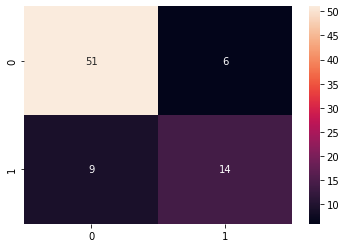

In [46]:
sns.heatmap(cm,annot=True)

In [47]:
# check report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        57
           1       0.70      0.61      0.65        23

    accuracy                           0.81        80
   macro avg       0.77      0.75      0.76        80
weighted avg       0.81      0.81      0.81        80



In [48]:
# check score of training data
knn.score(X_train,y_train)*100

86.25

## Find K n_neighbors value

In [49]:
from sklearn.metrics import accuracy_score

In [54]:
sk = []
for i in range(1,20):
    knn1 = KNeighborsClassifier(i)
    knn1.fit(X_train,y_train)
    y_pred = knn1.predict(X_test)
    sk.append(accuracy_score(y_test,y_pred))

In [55]:
print(sk)

[0.825, 0.8125, 0.825, 0.8125, 0.8125, 0.825, 0.8125, 0.825, 0.825, 0.8, 0.7875, 0.7875, 0.7875, 0.7875, 0.8125, 0.8, 0.8125, 0.7875, 0.7875]


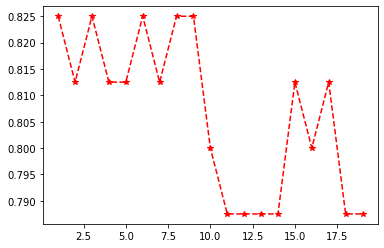

In [60]:
# lets plot above data
plt.plot(range(1,20),sk,'--*r')
#plt.xlim((1,21))

From above plot after discussion we decide to select n_neighbors=9

In [61]:
knn3 = KNeighborsClassifier(n_neighbors=9)
knn3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [62]:
y_pred = knn3.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [63]:
y_test.values

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [64]:
# check CM
cm = confusion_matrix(y_test,y_pred)
cm

array([[52,  5],
       [ 9, 14]], dtype=int64)

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        57
           1       0.74      0.61      0.67        23

    accuracy                           0.82        80
   macro avg       0.79      0.76      0.77        80
weighted avg       0.82      0.82      0.82        80



In [67]:
X.describe()

,Gender,Age,EstimatedSalary
count,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000
std,0.500526,10.482877,34096.960282
min,0.000000,18.000000,15000.000000
25%,0.000000,29.750000,43000.000000
50%,0.000000,37.000000,70000.000000
75%,1.000000,46.000000,88000.000000
max,1.000000,60.000000,150000.000000


In [ ]:
#sqrt[(Age1-Age2)**2+(Sal1-sal2**2)]
# From above statistical information we can conclude Salary will dominate remaining features
# hence we need to apply Scaling here

In [68]:
#StandardScaler() = (X - mue)/sigma std

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000


In [69]:
df.EstimatedSalary.mean()

69742.5

In [70]:
df.EstimatedSalary.std()

34096.960282424785

In [73]:
#19000 - mean(x)/std(X)
(67000-69742.5)/34096.96

-0.0804323904535771

In [74]:
sc = StandardScaler()
sc.fit(X)

StandardScaler()

In [76]:
X_new = sc.transform(X)
X_new[:3]

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968]])

In [77]:
len(X_new)

400

In [78]:
# split a data again
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=.2)

In [79]:
knn3

KNeighborsClassifier(n_neighbors=9)

In [80]:
knn3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [84]:
y_pred= knn3.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [85]:
# now check confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[45,  2],
       [ 3, 30]], dtype=int64)

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        47
           1       0.94      0.91      0.92        33

    accuracy                           0.94        80
   macro avg       0.94      0.93      0.94        80
weighted avg       0.94      0.94      0.94        80

